In [2]:
import pandas as pd
import os
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

#import folium  #needed for interactive map
#from folium.plugins import HeatMap

import branca

#import geopandas
#from shapely.geometry import Polygon
#from shapely.geometry import Point
#from geopandas import GeoDataFrame



plotsize = (15,6)


In [5]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    
    return unique_list

## Data Reading

Reading the data from the *MTFF Graphs English.xlsx* file and loading the information for Graph 3.11

In [41]:
data_g311 = pd.read_excel(io = "./MTFF Graphs English.xlsx", sheet_name = "G 3.11.", skiprows = 26, usecols = "B:S", header = 0, nrows = 4)

data_g311.rename({"Año": 'KPI',
                 2019 : '2019',
                 2020 : '2020',
                 2021 : '2021',
                2022 : '2022',
                 2023 : '2023',
                2024 : '2024',
                2025 : '2025',
                2026 : '2026',
                2027 : '2027',
                2028 : '2028',
                2029 : '2029',
                2030 : '2030',
                2031 : '2031',
                2032 : '2032',
                2033 : '2033',
                2034 : '2034',
                2035 : '2035'}, axis = 1, inplace = True)

print(data_g311)

         KPI  2019  2020  2021  2022  2023  2024  2025  2026  2027  2028  \
0  MTFF 2023  48.4  60.7  60.1  57.9  55.8  57.1  57.0  56.9  56.7  56.5   
1  MTFF 2024  48.4  60.7  60.0  57.7  53.8  55.3  56.5  56.6  56.6  56.7   
2      Limit  71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0  71.0   
3     Anchor  55.0  55.0  55.0  55.0  55.0  55.0  55.0  55.0  55.0  55.0   

   2029  2030  2031  2032  2033  2034  2035  
0  56.2  55.9  55.6  55.5  55.1  54.9   NaN  
1  56.5  56.3  56.1  55.8  55.6  55.5  55.4  
2  71.0  71.0  71.0  71.0  71.0  71.0  71.0  
3  55.0  55.0  55.0  55.0  55.0  55.0  55.0  


## Data cleansing

Melting the information into a [% GDP, year] tuple per each [KPI]

In [38]:
data_g311_graph = pd.melt(data_g311, id_vars = ["KPI"], value_vars = ['2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035'], var_name = "Year")
data_g311_graph.rename({'value': '% GDP'}, inplace = True, axis = 1)
data_g311_graph

,KPI,Year,% GDP
0,MTFF 2023,2019,48.4
1,MTFF 2024,2019,48.4
2,Limit,2019,71.0
3,Anchor,2019,55.0
4,MTFF 2023,2020,60.7
...,...,...,...
63,Anchor,2034,55.0
64,MTFF 2023,2035,NaN
65,MTFF 2024,2035,55.4
66,Limit,2035,71.0


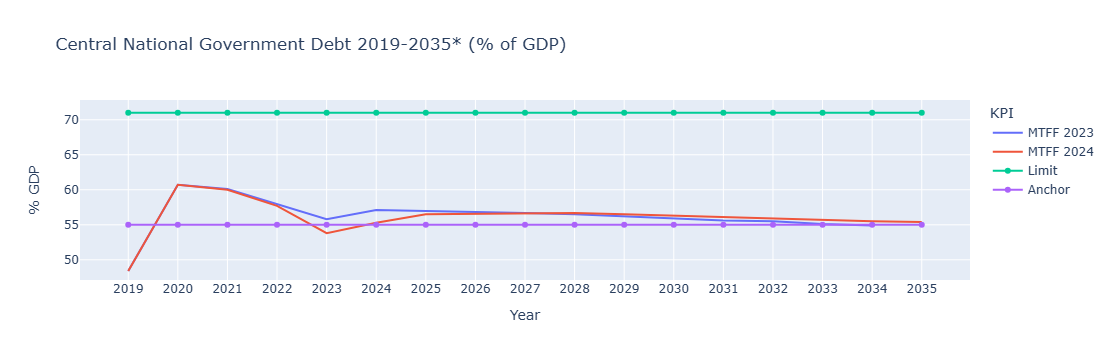

In [42]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

df = data_g311_graph.copy()

fig = px.line(df[~df.KPI.isin(["Limit", "Anchor"])], x="Year", y="% GDP", color="KPI", title = "Central National Government Debt 2019-2035* (% of GDP)")
fig.add_trace(go.Scatter(x=df[df.KPI == "Limit"]['Year'], y=df[df.KPI == "Limit"]['% GDP'], name="Limit"))
fig.add_trace(go.Scatter(x=df[df.KPI == "Anchor"]['Year'], y=df[df.KPI == "Anchor"]['% GDP'], name="Anchor"))
fig.show()

fig.write_html('./G311.html')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


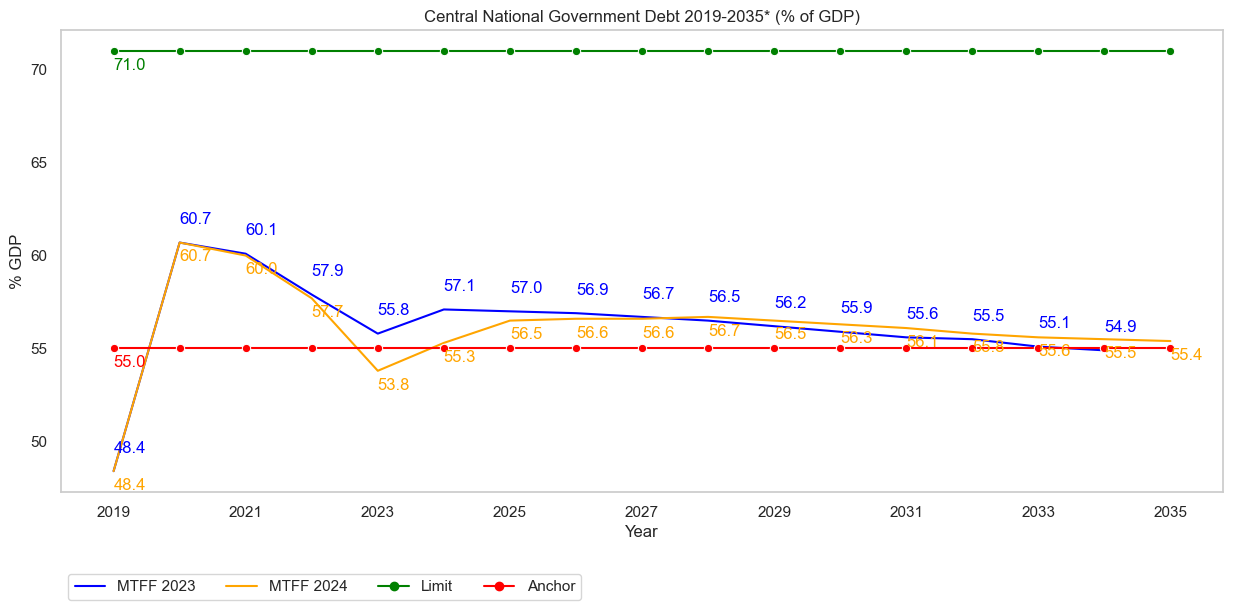

In [40]:
df1 = data_g311_graph.copy()

# Creating a dataframe for the non-constant lines to be drawn
df = df1[~df1.KPI.isin(["Limit", "Anchor"])].pivot(index='Year', columns='KPI', values='% GDP')

fig, ax = plt.subplots(figsize = plotsize)

# Drawing the non-constant lines
df.plot(kind='line', ax=ax, color = ['blue', 'orange'])

# Getting the data for the data labels
df_linea = data_g311_graph[data_g311_graph.KPI == "MTFF 2023"]
# label points on the plot
for x, y in zip(df_linea['Year'], df_linea['% GDP']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y+1, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(y, 1), # data label, formatted to ignore decimals
     color = 'blue') # set colour of line

    
df_linea = data_g311_graph[data_g311_graph.KPI == "MTFF 2024"]
# label points on the plot
for x, y in zip(df_linea['Year'], df_linea['% GDP']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
     plt.text(x = x, # x-coordinate position of data label
     y = y-1, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(y, 1), # data label, formatted to ignore decimals
     color = 'orange') # set colour of line


sns.lineplot(x="Year",  y="% GDP", data=df1[df1.KPI == "Limit"], color="green", ax=ax, marker='o')

legend_line_plot = mlines.Line2D([], [], color="green", label="Limit", marker='o')

plt.text(x = min(df1[df1.KPI == "Limit"].Year), # x-coordinate position of data label
     y = df1[df1.KPI == "Limit"].values[0,2]-1, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(df1[df1.KPI == "Limit"].values[0,2], 1), # data label, formatted to ignore decimals
     color = 'green') # set colour of line

sns.lineplot(x="Year",  y="% GDP", data=df1[df1.KPI == "Anchor"], color="red", ax=ax, marker='o')

legend_line_plot_2 = mlines.Line2D([], [], color="red", label="Anchor", marker='o')

plt.text(x = min(df1[df1.KPI == "Anchor"].Year), # x-coordinate position of data label
     y = df1[df1.KPI == "Anchor"].values[0,2]-1, # y-coordinate position of data label, adjusted to be 150 below the data point
     s = np.round(df1[df1.KPI == "Anchor"].values[0,2], 1), # data label, formatted to ignore decimals
     color = 'red') # set colour of line

handles, labels = ax.get_legend_handles_labels()
handles.extend([legend_line_plot, legend_line_plot_2])

ax.legend(handles=handles, loc='lower left', bbox_to_anchor=(0, -0.25), ncols = 4)
plt.title("Central National Government Debt 2019-2035* (% of GDP)")
ax.grid(False)
